## Preliminary Modelling

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df_all = pd.read_csv('220306_slugs_dataset.csv')
df_inp = df_all.drop(['loadCase', 'out_supReac_kN_n3', 'out_supReac_kN_n4', 'out_verDisp_mm_n5'], axis=1)
df_inp = df_inp.dropna()

In [40]:
# Create some new features
df_inp['densDiff'] = df_inp['slugDen'] - df_inp['pockDen']
df_inp['centrFor'] = df_inp['slugVel']**2 * df_inp['densDiff']

In [41]:
df_inp.describe()

,slugDen,slugLen,pockDen,pockLen,slugVel,basePer,baseAmp,basePha,simTime,out_oopDisp_mm_n2,out_oopDisp_mm_n5,out_endBend_kNm_n6,densDiff,centrFor
count,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000
mean,749.873015,10.000500,199.759649,10.010242,7.993685,11.999793,0.699832,60.026618,41.568940,182.077874,187.301203,218.388931,550.113366,37334.067936
std,75.247244,1.988917,49.987285,1.998691,1.990544,1.001185,0.100230,10.025549,15.654733,31.026056,44.422666,59.079226,90.197457,19028.582742
min,439.010000,0.750000,9.470000,2.070000,0.400000,8.050000,0.270000,20.910000,15.200000,73.240000,73.890000,83.330000,182.810000,69.683200
25%,699.075000,8.660000,166.205000,8.650000,6.655000,11.330000,0.630000,53.210000,32.600000,162.600000,160.960000,177.360000,488.995000,23384.349586
50%,749.200000,10.010000,199.700000,10.010000,7.990000,12.000000,0.700000,59.980000,38.500000,179.730000,180.340000,209.190000,549.770000,34583.397120
75%,801.125000,11.340000,233.475000,11.370000,9.330000,12.680000,0.770000,66.825000,46.700000,198.140000,203.755000,247.500000,610.910000,48175.250965
max,1066.900000,18.220000,404.010000,17.860000,16.810000,16.380000,1.110000,106.850000,884.800000,497.920000,711.910000,700.150000,951.300000,169747.298550


In [42]:
df_inp.head(3)

,slugDen,slugLen,pockDen,pockLen,slugVel,basePer,baseAmp,basePha,simTime,out_oopDisp_mm_n2,out_oopDisp_mm_n5,out_endBend_kNm_n6,densDiff,centrFor
0,785.67,6.47,234.16,10.06,5.77,12.55,0.85,74.10,45.8,197.45,180.47,198.49,551.51,18361.367279
1,705.03,10.36,190.44,11.25,7.42,11.63,0.80,59.11,44.0,186.85,178.72,238.07,514.59,28331.472876
2,741.98,11.64,159.09,12.52,7.42,11.54,0.65,65.23,48.2,155.47,163.53,180.64,582.89,32091.824996


## Data Scaling & Splitting

In [43]:
df_scl = df_inp.copy(deep=True)
scaler = preprocessing.StandardScaler()
df_scl = pd.DataFrame(scaler.fit_transform(df_scl), columns = df_scl.columns, index = df_scl.index)

In [44]:
df_scl['splits'] = pd.qcut(df_scl['out_oopDisp_mm_n2'], 100, labels=False)

In [45]:
train, test = train_test_split(df_scl, test_size=0.20, stratify=df_scl['splits']) 

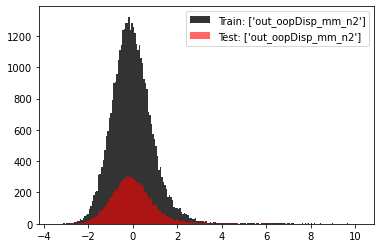

Max (train) =  10.2
Max (test) =  9.1


In [46]:
# Verify that stratification has been effective
n_bins = 200
param = ['out_oopDisp_mm_n2']
fig, axs = plt.subplots(figsize = (6, 4))
axs.hist(train[param].values, bins=n_bins, label = f'Train: {param}', color = 'black', alpha=0.8, zorder=1)
axs.hist(test[param].values, bins=n_bins, label = f'Test: {param}', color = 'red', alpha=0.6, zorder=2)
axs.legend(loc = 'upper right')
plt.show()
print('Max (train) = ', round(train[param].values.max(), 1))
print('Max (test) = ', round(test[param].values.max(), 1))

In [47]:
train = train.drop(['splits'], axis=1)
test = test.drop(['splits'], axis=1)

In [61]:
pred_features = [
    'slugDen',  # 0
    'slugLen',  # 1
    'pockDen',  # 2
    'pockLen',  # 3
    'slugVel',  # 4
    'basePer',  # 5
    'baseAmp',  # 6
    'basePha',  # 7
    'simTime',  # 8
    'densDiff', # 9
    'centrFor'  # `0
]
pred_features = pred_features[:]
X_train = train.filter(pred_features)
y_train = train.filter(['out_oopDisp_mm_n2'])
X_test = test.filter(pred_features)
y_test = test.filter(['out_oopDisp_mm_n2'])

In [62]:
X_train.head(3)

,slugDen,slugLen,pockDen,pockLen,slugVel,basePer,baseAmp,basePha,simTime,densDiff,centrFor
41312,0.536065,-0.301926,-0.137029,0.290072,-0.016923,-0.639042,0.400763,0.534977,-0.183265,0.523153,0.026897
17612,1.606546,-0.467847,2.466259,-2.006454,-0.222899,-0.439277,-0.696723,-0.346779,-0.553764,-0.026535,-0.321239
44568,0.880665,0.326563,0.836028,0.730365,0.982814,-0.009782,0.101448,-0.525325,-0.502661,0.271370,1.027506


## Linear Regression

In [63]:
# create linear regression object
reg = linear_model.LinearRegression()
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [64]:
# Regression coefficients
print('Coefficients: ', reg.coef_)
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [[ 2.51499841e+12 -1.07910156e-01 -1.67073153e+12 -9.90276337e-02
  -6.00681305e-02 -4.27246094e-03  6.89381599e-01 -8.07046890e-03
   2.37083435e-02 -3.01468134e+12  4.63867188e-01]]
Variance score: 0.6431315379875493


In [65]:
# Scaling for inverse transform
y_bas = df_inp['out_oopDisp_mm_n2'].to_numpy().reshape(-1, 1)
scaler_m = preprocessing.StandardScaler()
y_scl = scaler_m.fit_transform(y_bas)
y_rsl = scaler_m.inverse_transform(y_scl)

In [66]:
y_bas

array([[197.45],
       [186.85],
       [155.47],
       ...,
       [168.38],
       [169.73],
       [178.7 ]])

In [67]:
y_rsl

array([[197.45],
       [186.85],
       [155.47],
       ...,
       [168.38],
       [169.73],
       [178.7 ]])

In [68]:
y = scaler_m.inverse_transform(y_test)
yhat = scaler_m.inverse_transform(reg.predict(X_test))

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

Results of sklearn.metrics:
MAE: 11.23
MSE: 342.82
RMSE: 18.52
R-Squared: 0.64


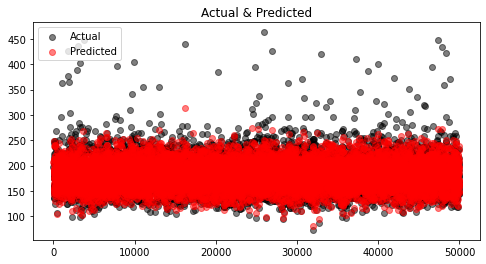

In [69]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.scatter(X_test.index, y, label = "Actual", color = 'black', zorder = 1, alpha=0.5)
plt.scatter(X_test.index, yhat, label = "Predicted", color = 'red', zorder = 2, alpha=0.5)
plt.legend(loc = "upper left")
plt.title("Actual & Predicted")
plt.show()

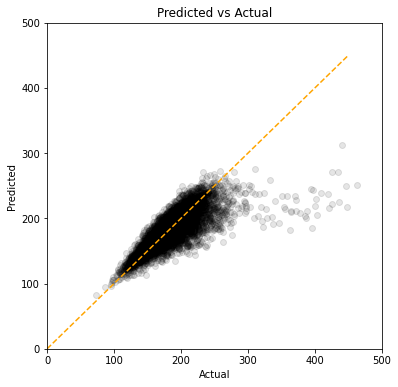

In [70]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.scatter(y, yhat, color = 'black', zorder = 1, alpha=0.1)
plt.plot([0, 450], [0, 450], '--', color = 'orange', zorder = 2)
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

## Random Forest Regression
The main benefit of using regression trees is that these methods are able to find non-linear relationships between the dependent and independent variables whereas the previous method focused on the linear relationships. This is often of benefit when it comes to more complex relationships between variables but can sometimes come at the cost of overfitting and also time and resources.

In [109]:
# Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)    
regressor.fit(X_train.to_numpy(), y_train.to_numpy().ravel())

RandomForestRegressor(n_estimators=50, random_state=0)

In [110]:
y_pred = regressor.predict(X_test.to_numpy())

In [111]:
y = scaler_m.inverse_transform(y_test)
yhat = scaler_m.inverse_transform(y_pred.reshape(-1, 1))

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

Results of sklearn.metrics:
MAE: 5.53
MSE: 66.06
RMSE: 8.13
R-Squared: 0.93


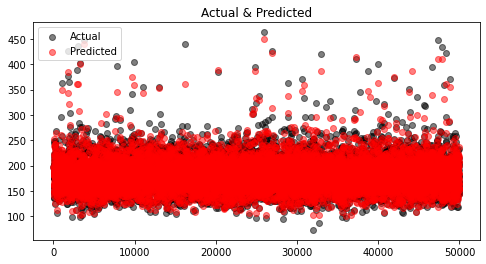

In [112]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.scatter(X_test.index, y, label = "Actual", color = 'black', zorder = 1, alpha=0.5)
plt.scatter(X_test.index, yhat, label = "Predicted", color = 'red', zorder = 2, alpha=0.5)
plt.legend(loc = "upper left")
plt.title("Actual & Predicted")
plt.show()

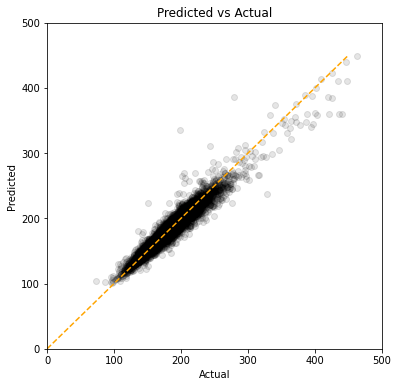

In [113]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.scatter(y, yhat, color = 'black', zorder = 1, alpha=0.1)
plt.plot([0, 450], [0, 450], '--', color = 'orange', zorder = 2)
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

In [114]:
df_imp = pd.DataFrame()
df_imp["Para"], df_imp["importance"] = [list(X_test.columns), regressor.feature_importances_]
df_imp.sort_values('importance', ascending=False)

,Para,importance
6,baseAmp,0.474800
8,simTime,0.342250
1,slugLen,0.040696
3,pockLen,0.037124
4,slugVel,0.031438
10,centrFor,0.020526
9,densDiff,0.019039
0,slugDen,0.011474
5,basePer,0.008298
7,basePha,0.007358
